In [2]:
# Step 1: Import required libraries

import requests
import pandas as pd
import json

In [4]:
# Step 2: Query UniProt API

base_url = "https://rest.uniprot.org/uniprotkb/search"

# Define the query string
query = "reviewed:true AND organism_id:9606 AND covid"

# Include query in params
params = {
    "query": query,
    "format": "json",
    "size": 50
}

response = requests.get(base_url, params=params)

print("Status code:", response.status_code)

# Parse JSON if request was successful
if response.status_code == 200:
    data = response.json()
    print("Keys in JSON:", data.keys())
else:
    print("Failed to retrieve data.")
    print("Response text:", response.text)

Status code: 200
Keys in JSON: dict_keys(['results'])


In [5]:
# Step 3: Parse UniProt API results into a pandas DataFrame

results = data['results']

# Extract key information from each entry
records = []
for r in results:
    accession = r.get('primaryAccession', '')
    entry_name = r.get('uniProtkbId', '')
    # Some entries may not have all nested keys, so use .get() carefully
    protein_name = r.get('proteinDescription', {}).get('recommendedName', {}).get('fullName', {}).get('value', '')
    organism = r.get('organism', {}).get('scientificName', '')
    length = r.get('sequence', {}).get('length', None)

    records.append({
        "Accession": accession,
        "Entry Name": entry_name,
        "Protein Name": protein_name,
        "Organism": organism,
        "Length": length
    })

# Convert list of dicts to a DataFrame
df = pd.DataFrame(records)
df.head()

,Accession,Entry Name,Protein Name,Organism,Length
0,Q8IUC6,TCAM1_HUMAN,TIR domain-containing adapter molecule 1,Homo sapiens,712
1,Q92985,IRF7_HUMAN,Interferon regulatory factor 7,Homo sapiens,503
2,P00973,OAS1_HUMAN,2'-5'-oligoadenylate synthase 1,Homo sapiens,400
3,P48551,INAR2_HUMAN,Interferon alpha/beta receptor 2,Homo sapiens,515
4,P17181,INAR1_HUMAN,Interferon alpha/beta receptor 1,Homo sapiens,557


In [6]:
# Step 4: Save to CSV

# Save the dataframe to a CSV file
output_file = "uniprot_covid_proteins.csv"
df.to_csv(output_file, index=False)
print(f"Data saved to {output_file}")


Data saved to uniprot_covid_proteins.csv


Number of proteins: 35
Average protein length: 592.8


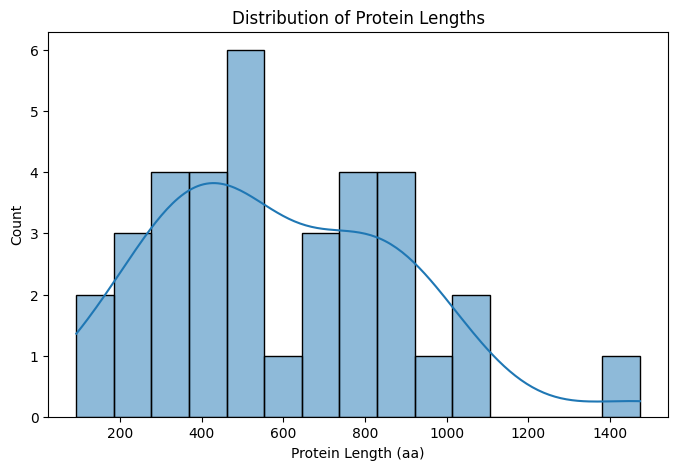

,Accession,Entry Name,Protein Name,Organism,Length
30,Q9C000,NLRP1_HUMAN,"NACHT, LRR and PYD domains-containing protein 1",Homo sapiens,1473
9,Q9NYK1,TLR7_HUMAN,Toll-like receptor 7,Homo sapiens,1049
16,Q96P20,NLRP3_HUMAN,"NACHT, LRR and PYD domains-containing protein 3",Homo sapiens,1036
17,O14786,NRP1_HUMAN,Neuropilin-1,Homo sapiens,923
19,P10275,ANDR_HUMAN,Androgen receptor,Homo sapiens,920
6,O15455,TLR3_HUMAN,Toll-like receptor 3,Homo sapiens,904
14,Q96JC1,VPS39_HUMAN,Vam6/Vps39-like protein,Homo sapiens,886
20,P49754,VPS41_HUMAN,Vacuolar protein sorting-associated protein 41...,Homo sapiens,854
28,Q9BYF1,ACE2_HUMAN,Angiotensin-converting enzyme 2,Homo sapiens,805
27,P09958,FURIN_HUMAN,Furin,Homo sapiens,794


In [7]:
# Step 5:  Basic Analysis and Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Basic stats
print("Number of proteins:", df.shape[0])
print("Average protein length:", df['Length'].mean())

# Visualization: protein length distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Length'], bins=15, kde=True)
plt.title('Distribution of Protein Lengths')
plt.xlabel('Protein Length (aa)')
plt.ylabel('Count')
plt.show()

# Top 10 longest proteins
df.sort_values('Length', ascending=False).head(10)